<a href="https://colab.research.google.com/github/Alanazi433/GenAI/blob/main/GenAI/HW1/Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - accuracy: 0.1435 - loss: 2.3121 - val_accuracy: 0.2291 - val_loss: 2.0548
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 32ms/step - accuracy: 0.1670 - loss: 2.1510 - val_accuracy: 0.2439 - val_loss: 2.0444
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.1733 - loss: 2.1260 - val_accuracy: 0.2719 - val_loss: 2.0341
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.1791 - loss: 2.1172 - val_accuracy: 0.2502 - val_loss: 2.0088
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 34ms/step - accuracy: 0.1824 - loss: 2.1072 - val_accuracy: 0.2482 - val_loss: 2.0308
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.1856 - loss: 2.1077 - val_accuracy: 0.2377 - val_loss: 2.0228
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.1922 - loss: 2.0926 - val_accuracy: 0.2403 - val_loss: 2.0602
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.1881 - loss: 2.0996 - 

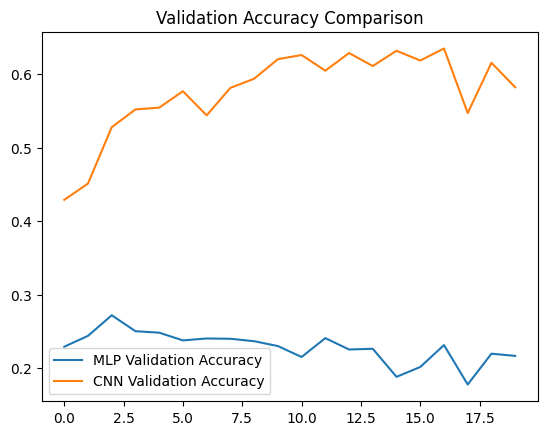

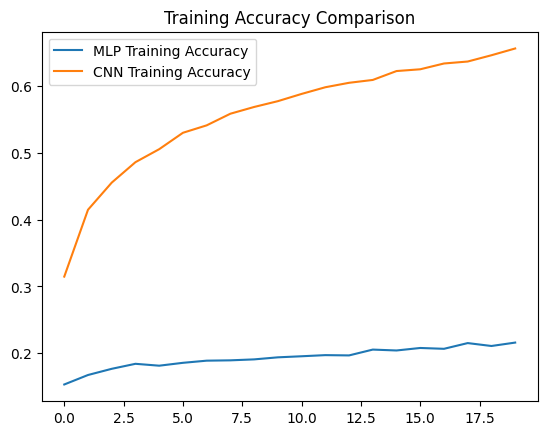

In [2]:
# author: Husam Alanazi
# purpose: Comparing MLP and CNN architectures on CIFAR_10 DATASET

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, BatchNormalization, ReLU
import matplotlib.pyplot as plt

# Data Preprocessing
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    return (x_train, y_train), (x_test, y_test)

# MLP Model
def create_mlp_model(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# CNN Model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), strides=(2, 2), padding='same', input_shape=input_shape),
        BatchNormalization(),
        ReLU(),
        Conv2D(64, (3, 3), strides=(2, 2), padding='same'),
        BatchNormalization(),
        ReLU(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Plotting function
def plot_results(history_mlp, history_cnn):
    # Plot validation accuracy
    plt.plot(history_mlp.history['val_accuracy'], label='MLP Validation Accuracy')
    plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
    plt.legend()
    plt.title('Validation Accuracy Comparison')
    plt.show()

    # Plot training accuracy
    plt.plot(history_mlp.history['accuracy'], label='MLP Training Accuracy')
    plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy')
    plt.legend()
    plt.title('Training Accuracy Comparison')
    plt.show()

def main():
    # Load and preprocess data
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()

    # Create and train MLP model
    mlp_model = create_mlp_model(x_train.shape[1:])
    history_mlp = mlp_model.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size=64)

    # Create and train CNN model
    cnn_model = create_cnn_model(x_train.shape[1:])
    history_cnn = cnn_model.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size=64)

    # Evaluate models
    test_loss_mlp, test_acc_mlp = mlp_model.evaluate(x_test, y_test)
    test_loss_cnn, test_acc_cnn = cnn_model.evaluate(x_test, y_test)

    print(f"MLP Test accuracy: {test_acc_mlp}")
    print(f"CNN Test accuracy: {test_acc_cnn}")

    # Plot results
    plot_results(history_mlp, history_cnn)

if __name__ == '__main__':
    main()
